In [2]:
#### Import libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#### Analyzing ski resort data:

In [6]:
# Load all_US_skiers.csv 
US_skiers = pd.read_csv('all_US_skiers.csv')

The most common ski club is Park City Ski and Snowboard with 12 members.


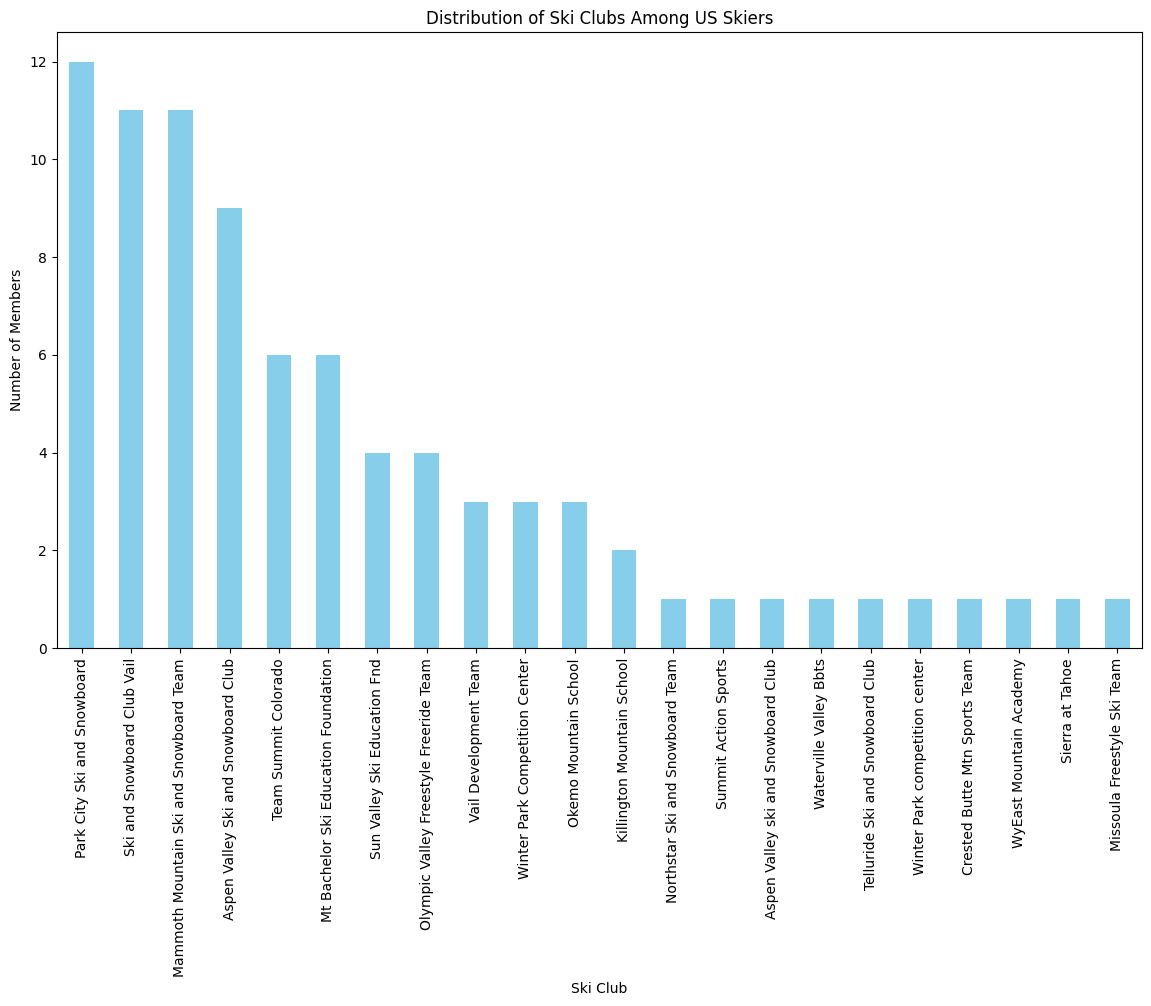

In [10]:
# Count occurrences of each ski club among US skiers
skiclub_counts = US_skiers['Skiclub'].value_counts()

# Identify the most common ski club
most_common_skiclub = skiclub_counts.idxmax()  
most_common_count = skiclub_counts.max()       
print(f"The most common ski club is {most_common_skiclub} with {most_common_count} members.")

# Plot a bar graph to show the distribution of ski clubs
plt.figure(figsize=(14, 8))
skiclub_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ski Clubs Among US Skiers')
plt.xlabel('Ski Club')
plt.ylabel('Number of Members')
plt.xticks(rotation=90) 
plt.savefig('Distribution_of_ski_clubs.png', dpi=300, bbox_inches='tight')
plt.show()

The most common ski club among top-performing skiers is Aspen Valley Ski and Snowboard Club with 3 members.


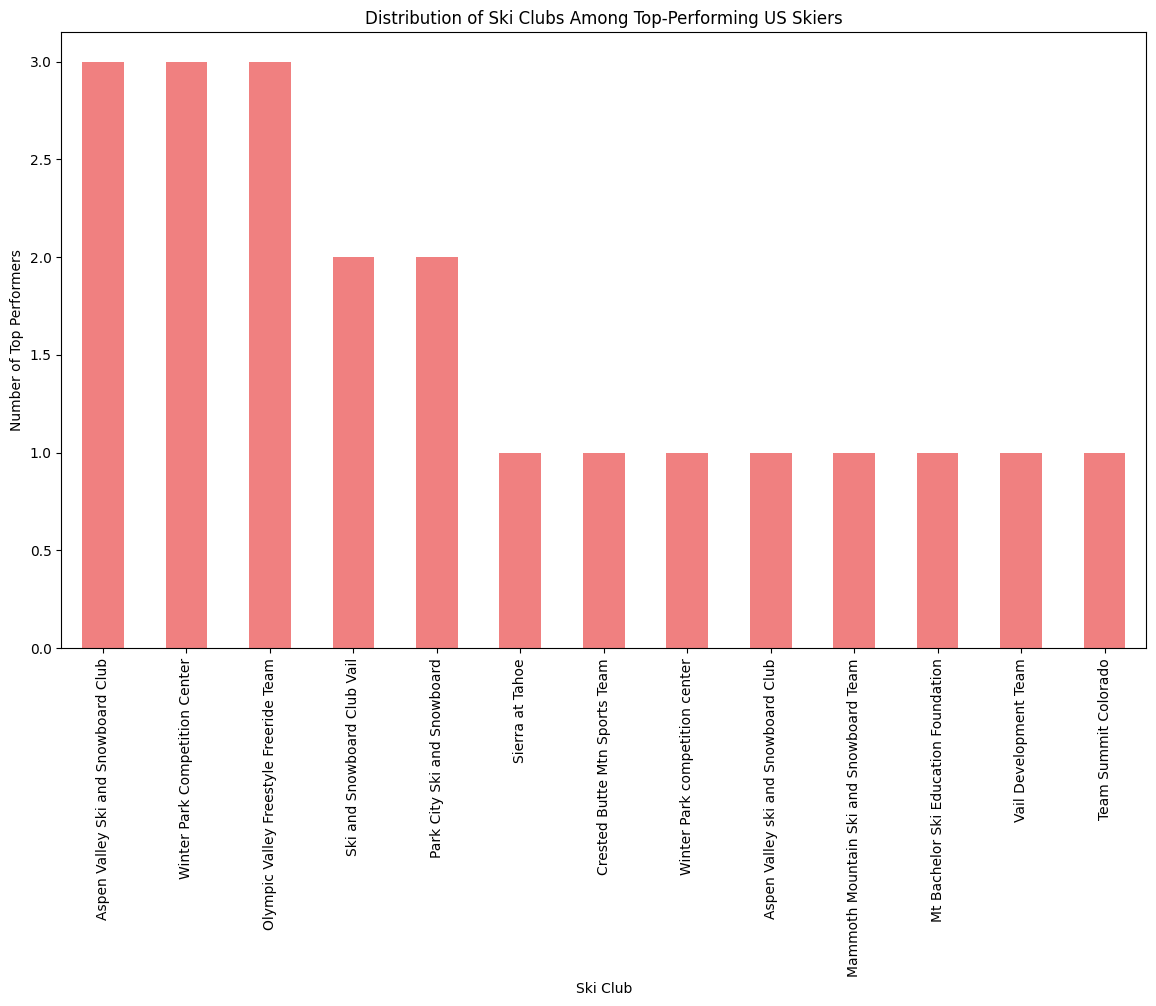

In [14]:
# Define the 75th percentile threshold for HP points to identify top performers
threshold = US_skiers['HPpoints'].quantile(0.75)  # 75th percentile of HP points

# Filter for skiers whose HP points are greater than or equal to the threshold
top_scorers = US_skiers[US_skiers['HPpoints'] >= threshold]

# Count occurrences of each ski club among these top-performing US skiers
top_ski_club_counts = top_scorers['Skiclub'].value_counts()

# Identify the most common ski club among top performers
most_common_top_ski_club = top_ski_club_counts.idxmax()  
most_common_top_count = top_ski_club_counts.max()        

# Print the most common top ski club information
print(f"The most common ski club among top-performing skiers is {most_common_top_ski_club} with {most_common_top_count} members.")

# Plot a bar graph to show the distribution of ski clubs among top performers
plt.figure(figsize=(14, 8))
top_ski_club_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Ski Clubs Among Top-Performing US Skiers')
plt.xlabel('Ski Club')
plt.ylabel('Number of Top Performers')
plt.xticks(rotation=90) 
plt.savefig('Distribution_of_ski_clubs_among_top_skiers.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Load resort_with_athletes.csv 
Resort_data = pd.read_csv('resort_with_athletes.csv')

Average Price by Region:
region_data
Northeast             87.600000
Pacific Northwest     88.909091
Pacific Southwest    111.375000
Rocky Mountain       115.708333
Name: Price, dtype: float64
Average Price by State:
state_data
California    111.375000
Colorado      121.944444
Idaho         107.000000
Oregon         78.571429
Utah           97.000000
Vermont        87.600000
Name: Price, dtype: float64


/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1667860743.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_data', y='Price', data=avg_price_by_region_df, palette='viridis')


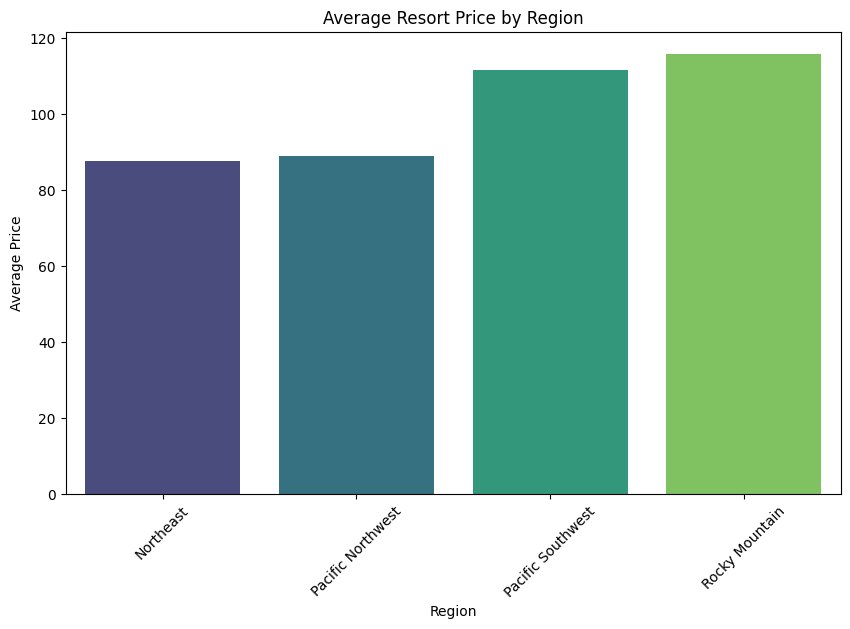

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1667860743.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_data', y='Price', data=avg_price_by_state_df, palette='magma')


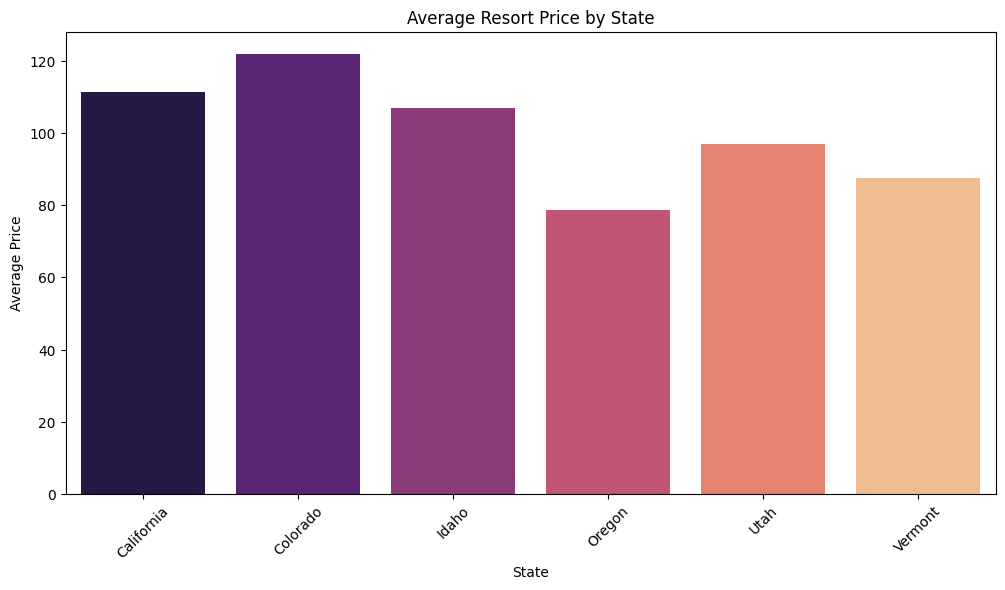

In [12]:
# Calculate the average price by region
avg_price_by_region = Resort_data.groupby('region_data')['Price'].mean()
print("Average Price by Region:")
print(avg_price_by_region)

# Calculate the average price by state
avg_price_by_state = Resort_data.groupby('state_data')['Price'].mean()
print("Average Price by State:")
print(avg_price_by_state)

# Convert the series to a DataFrame for easier plotting (for region)
avg_price_by_region_df = avg_price_by_region.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='region_data', y='Price', data=avg_price_by_region_df, palette='viridis')
plt.title('Average Resort Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

# Also, plot by state
avg_price_by_state_df = avg_price_by_state.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='state_data', y='Price', data=avg_price_by_state_df, palette='magma')
plt.title('Average Resort Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

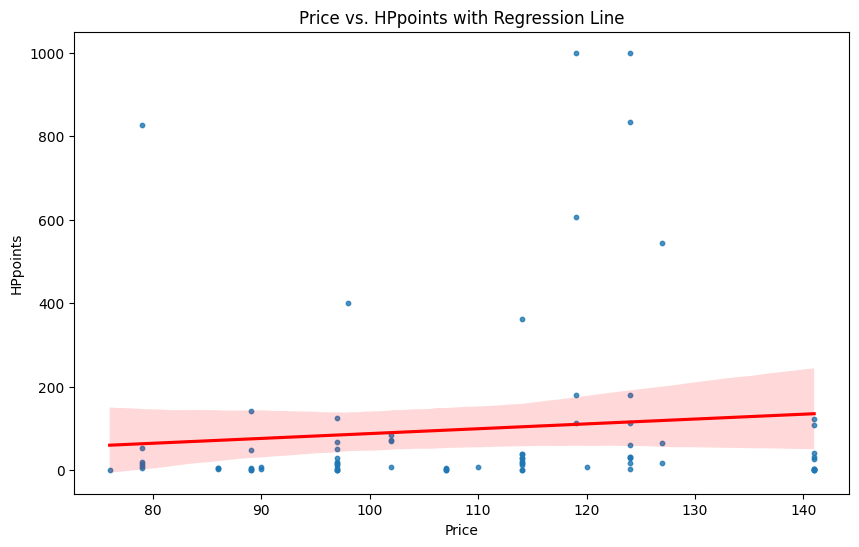

In [24]:
# Scatter plot of Price vs. HPPoints
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='HPpoints', data=Resort_data, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.title('Price vs. HPpoints with Regression Line')
plt.xlabel('Price')
plt.ylabel('HPpoints')
plt.savefig('price_vs_HPpoints.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
correlation = Resort_data['Price'].corr(Resort_data['HPpoints'])
print(f"Correlation between Price and HPpoints: {correlation:.2f}")
# resorts with higher prices have slightly higher HPpoints scores, but the relationship is minimal.

Correlation between Price and HPpoints: 0.10


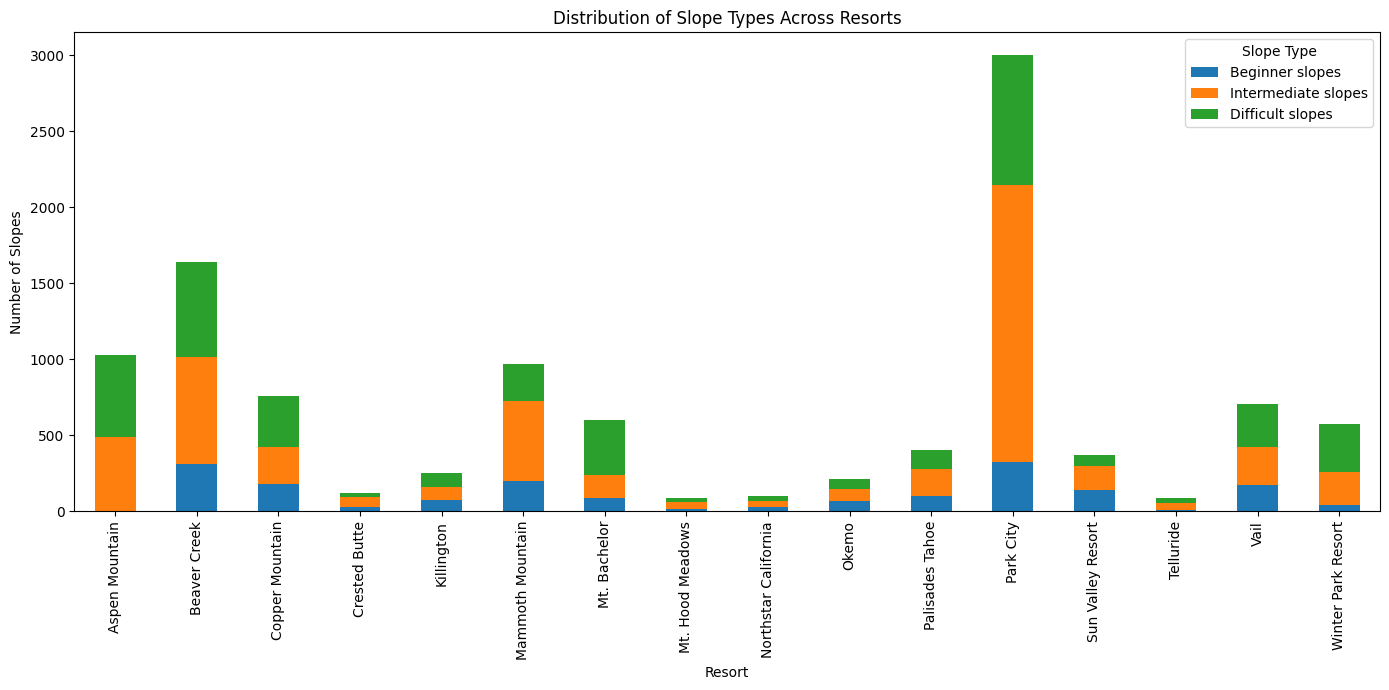

In [34]:
# Analyzing the Distribution of Slope Types Across Resorts

# Group the Resort_data by 'Resort' and sum the number of slopes for each type.
Resort_data_cleaned = Resort_data.groupby('Resort').sum().reset_index()

# Calculate total slopes for each resort.
Resort_data_cleaned['Total slopes'] = Resort_data_cleaned['Beginner slopes'] + \
                                       Resort_data_cleaned['Intermediate slopes'] + \
                                       Resort_data_cleaned['Difficult slopes']

# Set the index of the DataFrame to 'Resort' for easier plotting.
Resort_data_cleaned.set_index('Resort')[['Beginner slopes', 'Intermediate slopes', 'Difficult slopes']].plot(
    kind='bar',
    stacked=True,  
    figsize=(14, 7)  
)

plt.title('Distribution of Slope Types Across Resorts')  
plt.xlabel('Resort') 
plt.ylabel('Number of Slopes')  
plt.legend(title='Slope Type')  
plt.tight_layout()  
plt.savefig('Dist_of_slope_types.png', dpi=300, bbox_inches='tight')
plt.show()  

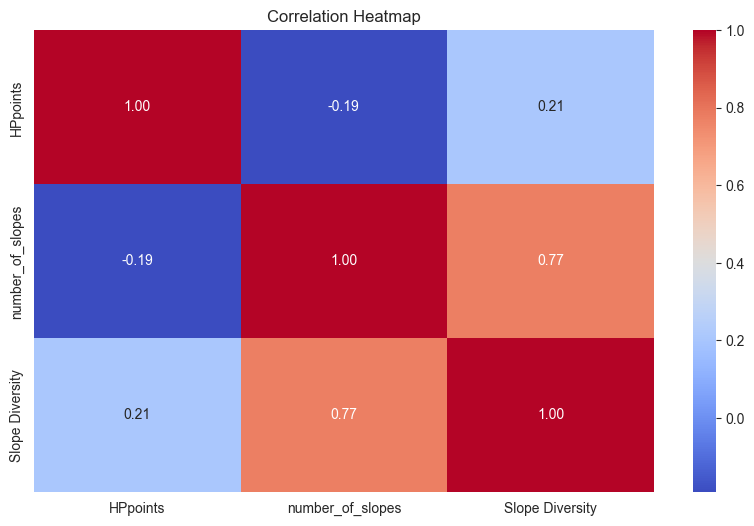

Correlation between HPpoints and Number of Slopes: -0.19
Correlation between HPpoints and Slope Diversity: 0.21


In [43]:
# Correlation between HPpoints, Number of Slopes and Slope Diversity

resort_performance = Resort_data.groupby('Resort').agg({
    'HPpoints': 'mean',
    'number_of_slopes': 'mean',
    'Beginner slopes': 'mean',
    'Intermediate slopes': 'mean',
    'Difficult slopes': 'mean'
}).reset_index()

# Calculate Diversity of Slopes
resort_performance['Slope Diversity'] = (
    resort_performance['Beginner slopes'] +
    resort_performance['Intermediate slopes'] +
    resort_performance['Difficult slopes']
)

plt.figure(figsize=(10, 6))
correlation_matrix = resort_performance[['HPpoints', 'number_of_slopes', 'Slope Diversity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('Correlation_between_HPpoints_Number_Slopes_and_Diversity.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the correlation coefficients
correlation_slope = resort_performance['HPpoints'].corr(resort_performance['number_of_slopes'])
correlation_diversity = resort_performance['HPpoints'].corr(resort_performance['Slope Diversity'])

print(f"Correlation between HPpoints and Number of Slopes: {correlation_slope:.2f}")
print(f"Correlation between HPpoints and Slope Diversity: {correlation_diversity:.2f}")

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_97593/3896011107.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nightskiing', y='HPpoints', data=night_skiing_performance, palette='viridis')


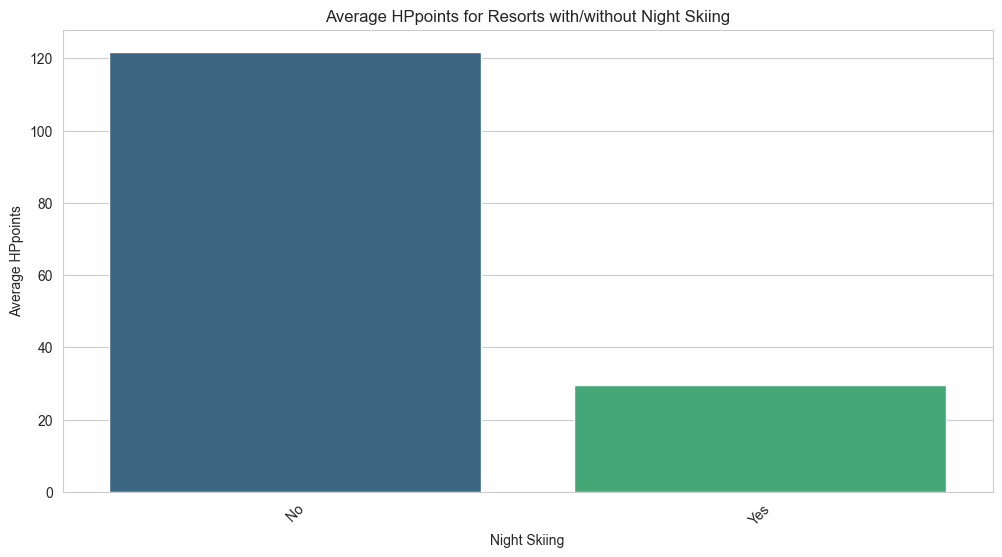

In [50]:
# Analyzing the Average HPpoints for Resorts with/without Night Skiing

# Convert categorical columns to string type if they are not already
Resort_data['Night skiing'] = Resort_data['Nightskiing'].astype(str)

# Calculate average HPpoints for resorts with and without night skiing
night_skiing_performance = Resort_data.groupby('Nightskiing')['HPpoints'].mean().reset_index()
summer_skiing_performance = Resort_data.groupby('Summer skiing')['HPpoints'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Nightskiing', y='HPpoints', data=night_skiing_performance, palette='viridis')
plt.title('Average HPpoints for Resorts with/without Night Skiing')
plt.xlabel('Night Skiing')
plt.ylabel('Average HPpoints')
plt.xticks(rotation=45)
plt.savefig('HPpoints_vs_Nightskiing.png', dpi=300, bbox_inches='tight')
plt.show()

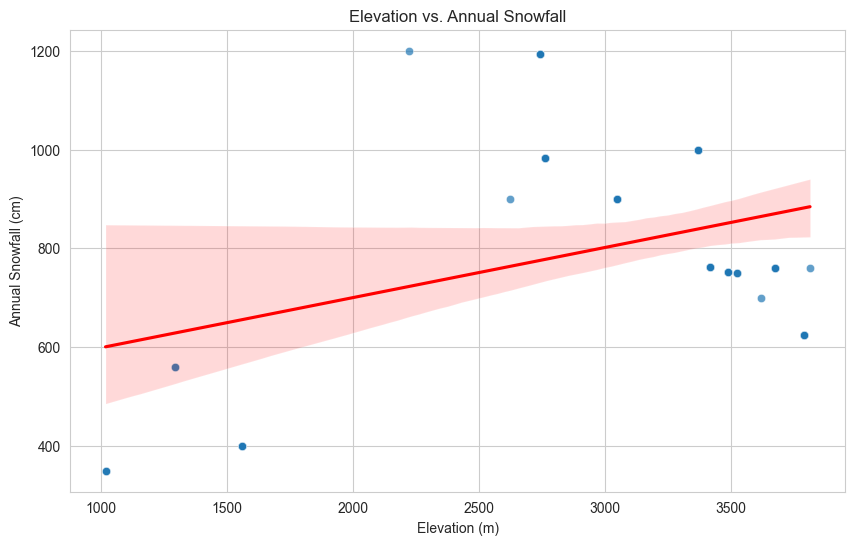

Pearson Correlation Coefficient: 0.36
P-value: 0.0010


In [53]:
#Analyze elevation vs snowfall

plt.figure(figsize=(10, 6))
sns.scatterplot(x='elevation_top_m', y='annual_snowfall_cm', data=Resort_data, alpha=0.7)

# Fit a regression line
sns.regplot(x='elevation_top_m', y='annual_snowfall_cm', data=Resort_data, scatter=False, color='red')

plt.title('Elevation vs. Annual Snowfall')
plt.xlabel('Elevation (m)')
plt.ylabel('Annual Snowfall (cm)')
plt.savefig('Elevation_vs_Snowfall.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(Resort_data['elevation_top_m'], Resort_data['annual_snowfall_cm'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

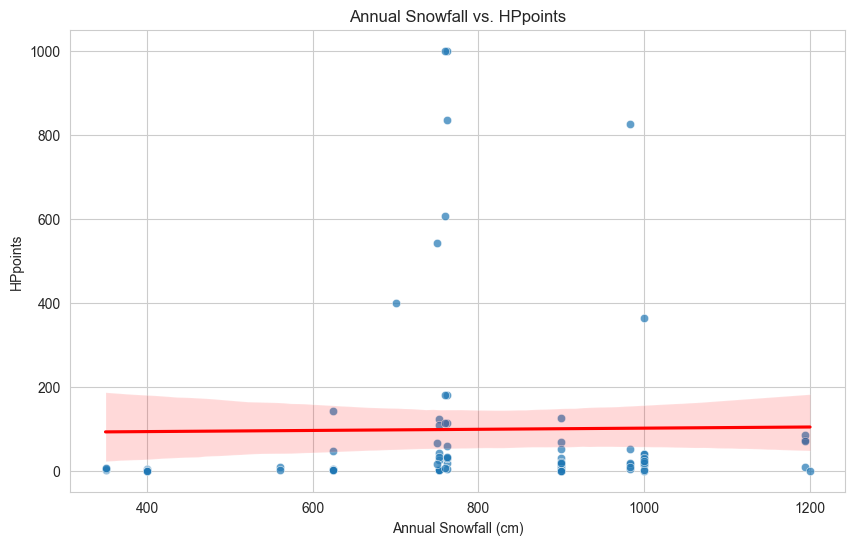

Pearson Correlation Coefficient: 0.01
P-value: 0.9123


In [55]:
#Analyze HPpoints vs snowfall

plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_snowfall_cm', y='HPpoints', data=Resort_data, alpha=0.7)

# Fit a regression line
sns.regplot(x='annual_snowfall_cm', y='HPpoints', data=Resort_data, scatter=False, color='red')

plt.title('Annual Snowfall vs. HPpoints')
plt.xlabel('Annual Snowfall (cm)')
plt.ylabel('HPpoints')
plt.savefig('HPpoints_vs_Snowfall.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(Resort_data['annual_snowfall_cm'], Resort_data['HPpoints'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_97593/4250795303.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='annual_snowfall_cm', y='region_data', data=region_snowfall, palette='viridis')


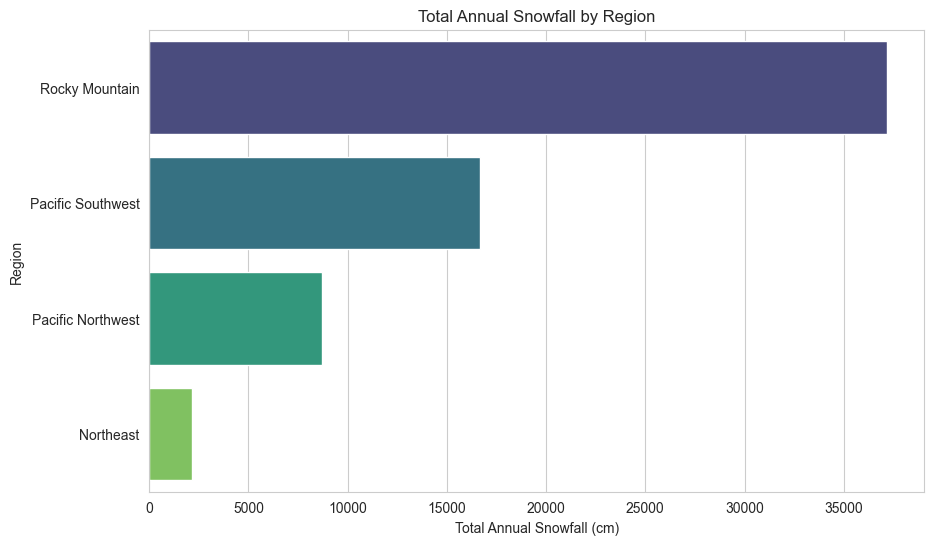

In [57]:
# Analyze snowfall by region

region_snowfall = Resort_data.groupby('region_data')['annual_snowfall_cm'].sum().reset_index()

# Sort the results in descending order
region_snowfall = region_snowfall.sort_values(by='annual_snowfall_cm', ascending=False)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot to visualize snowfall by region
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_snowfall_cm', y='region_data', data=region_snowfall, palette='viridis')

plt.title('Total Annual Snowfall by Region')
plt.xlabel('Total Annual Snowfall (cm)')
plt.ylabel('Region')
plt.savefig('Snowfall_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1693131104.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region_data', y='HPpoints', data=Resort_data, estimator='mean', ci=None, palette='viridis')
/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1693131104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_data', y='HPpoints', data=Resort_data, estimator='mean', ci=None, palette='viridis')


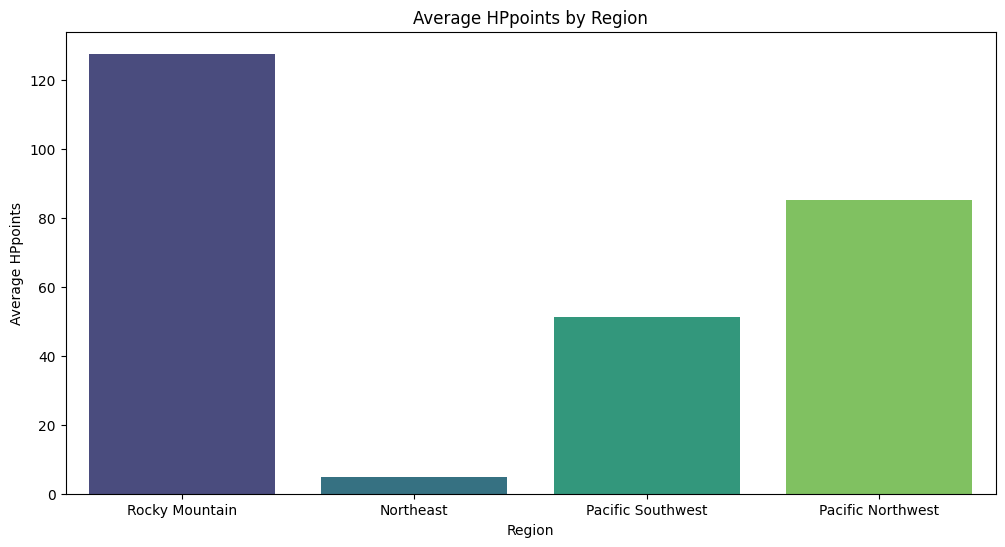

In [13]:
# Analyze HPpoints by region

# Calculate total slopes
Resort_data['Total Slopes'] = Resort_data['Beginner slopes'] + Resort_data['Intermediate slopes'] + Resort_data['Difficult slopes']

# Create a bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='region_data', y='HPpoints', data=Resort_data, estimator='mean', ci=None, palette='viridis')
plt.title('Average HPpoints by Region')
plt.xlabel('Region')
plt.ylabel('Average HPpoints')
plt.savefig('HPpoints_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/3512877787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region_data', y='annual_snowfall_cm', data=Resort_data, palette='viridis')


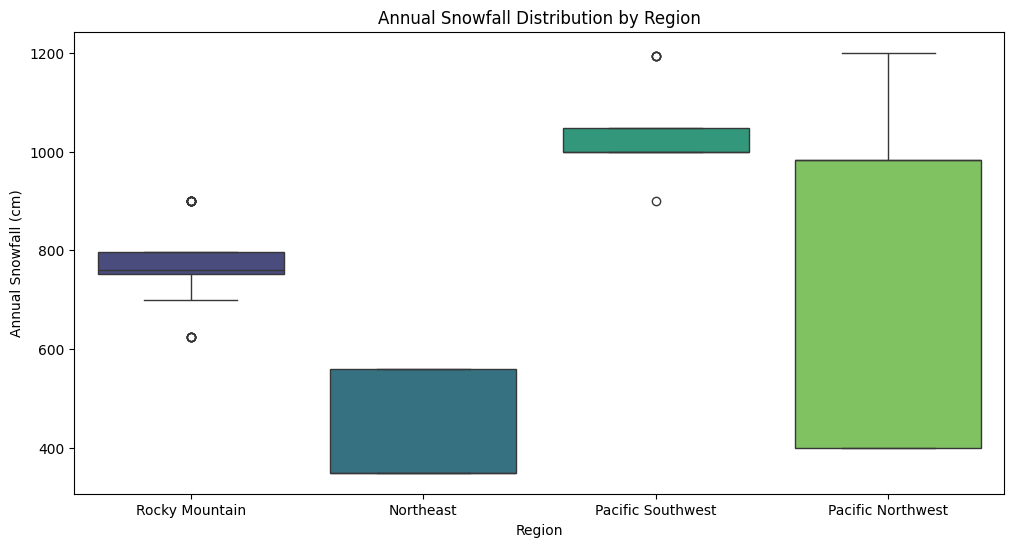

In [15]:
# Create a box plot for annual snowfall by region

plt.figure(figsize=(12, 6))
sns.boxplot(x='region_data', y='annual_snowfall_cm', data=Resort_data, palette='viridis')
plt.title('Annual Snowfall Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Annual Snowfall (cm)')
plt.savefig('Snowfall_by_region_box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1552885775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region_data', y='Price', data=Resort_data, palette='viridis')


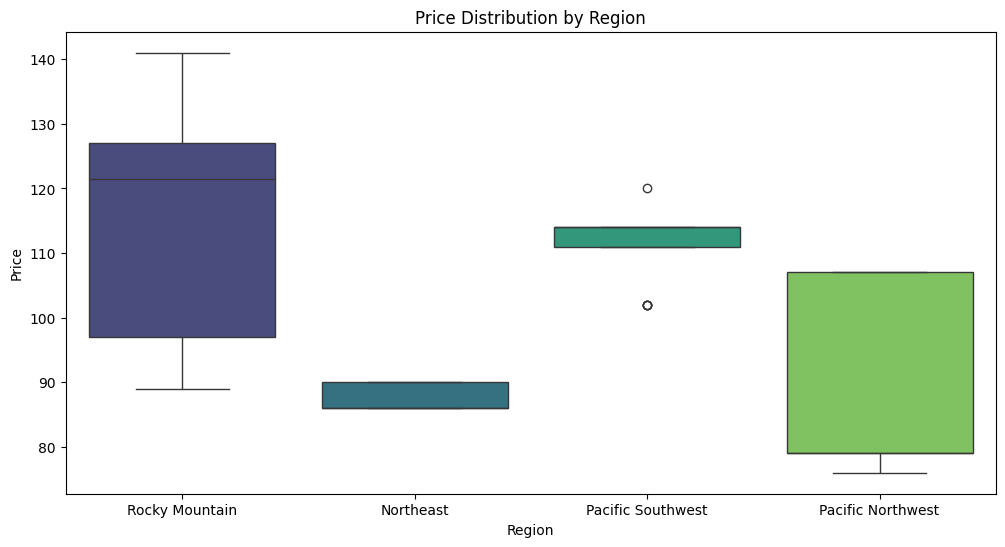

In [17]:
# Create a box plot for prices by region

plt.figure(figsize=(12, 6))
sns.boxplot(x='region_data', y='Price', data=Resort_data, palette='viridis')
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.savefig('price_by_region_box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1088097647.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region_data', y='Total Slopes', data=Resort_data, estimator='mean', ci=None, palette='viridis')
/var/folders/pr/lv1k_s2d1dxf_2_dbckgcn9h0000gn/T/ipykernel_5928/1088097647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region_data', y='Total Slopes', data=Resort_data, estimator='mean', ci=None, palette='viridis')


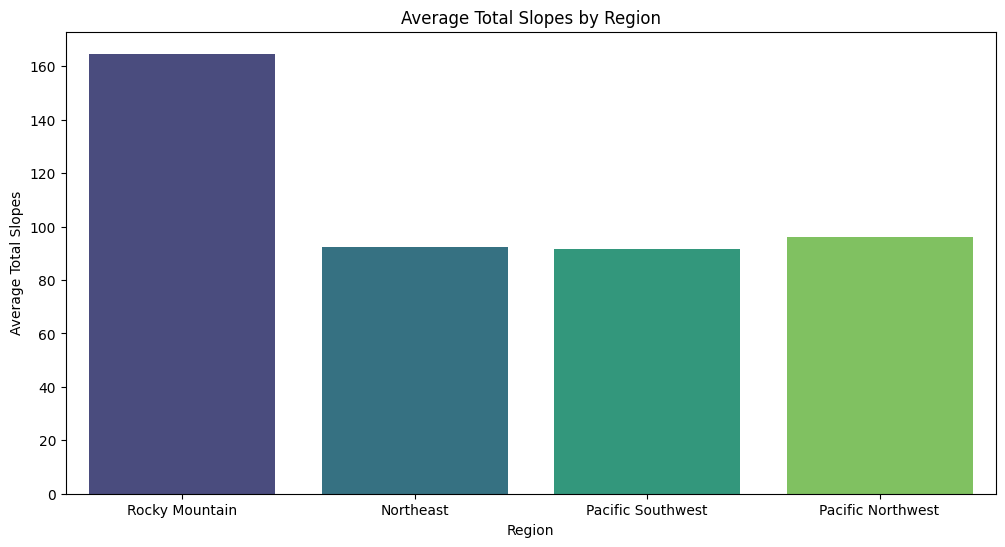

In [19]:
# Create a bar plot for total slopes by region

plt.figure(figsize=(12, 6))
sns.barplot(x='region_data', y='Total Slopes', data=Resort_data, estimator='mean', ci=None, palette='viridis')
plt.title('Average Total Slopes by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Slopes')
plt.savefig('slopes_by_region.png', dpi=300, bbox_inches='tight')
plt.show()